EDA of the data set

In [104]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.proportion import proportions_ztest

In [8]:
# Reading the data
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Hypothesis testing Objective:to prove (or disprove), with statistical evidence, that the BMI of females is different from that of males.

Defining the Null Hypothesis: There is no difference between the bmi of male and female

In [15]:
female=data.loc[data.sex=='female']
male=data.loc[data.sex=='male']
f_bmi=female.bmi
m_bmi=male.bmi

In [18]:
# calculating the mean of the bmi
bmi_male_mean=m_bmi.mean()
bmi_female_mean=f_bmi.mean()
print("Mean of bmi of male is",round(bmi_male_mean,2))
print("Mean of bmi of female is",round(bmi_female_mean,2))

Mean of bmi of male is 30.94
Mean of bmi of female is 30.38


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16924\1994206226.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_bmi,color='green',hist=False)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16924\1994206226.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m_bmi,color='red',

<Axes: xlabel='bmi', ylabel='Density'>

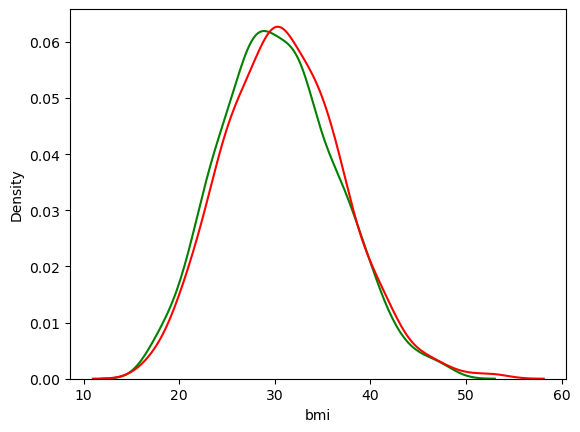

In [22]:
sns.distplot(f_bmi,color='green',hist=False)
sns.distplot(m_bmi,color='red',hist=False)

In [27]:
# finding the t-value and the p-value for proving or disproving the null hypothesis
alpha=0.05 #from confidence interval at 95%
t_value,p_value=stats.ttest_ind(m_bmi,f_bmi)
print("t_value=",t_value)
print("p_value=",p_value)

t_value= 1.696752635752224
p_value= 0.08997637178984932


In [28]:
if p_value < alpha:
    print("We reject the null Hypothesis that there is no difference between the bmi of male and female")
else:
    print("We fail to reject the null Hypothesis that there is no difference between the bmi of male and female")

We fail to reject the null Hypothesis that there is no difference between the bmi of male and female


Hypothesis testing Objective:  To prove (or disprove) that the medical claims made by the people who smoke are greater than those who don't.

Defining
Null Hypothesis: The average charges of Smoker are less or equal to the non-smoker
Alternative Hypothesis: The average charges of Smoker are greater than non-smoker

In [32]:
# finding mean charges of the smoker 
smoker= data.loc[data.smoker=='yes']
smoker_charges=smoker.charges
smoker_charges_mean=smoker_charges.mean()
round(smoker_charges_mean,3)

32050.232

In [33]:
# finding mean charges of the smoker 
nosmoker= data.loc[data.smoker=='no']
nosmoker_charges=nosmoker.charges
nosmoker_charges_mean=nosmoker_charges.mean()
round(nosmoker_charges_mean,3)

8434.268

[Text(0.5, 1.0, 'Smoker vs Charges')]

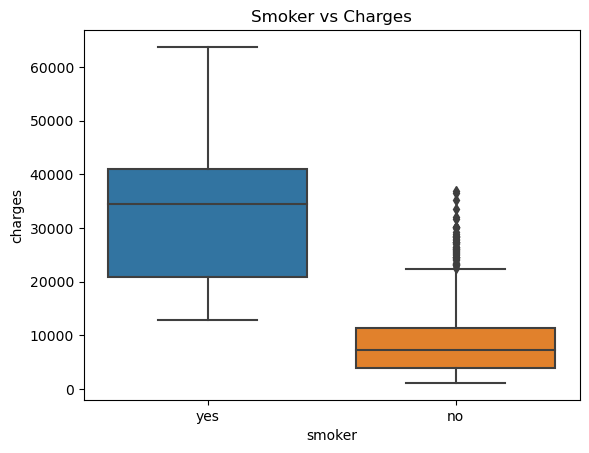

In [37]:
# representing charges of the smoker==yes have more charges as compared to with smoker==no
sns.boxplot(x=data.smoker,y=data.charges,data=data).set(title="Smoker vs Charges")

In [43]:
# Calculating the pValue for smoker vs non-Smoker
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(smoker_charges, nosmoker_charges)
if p_value1 < alpha:
    print("We reject the null Hypothesis that the average charges of Smoker are less or equal to the non-smoker")
else:
    print("We fail to reject the null Hypothesis that the average charges of Smoker are less or equal to the non-smoker")

We reject the null Hypothesis that the average charges of Smoker are less or equal to the non-smoker


Hypothesis testing Objective:compare the BMI of women with no children, one child, and two children.

Defining
Null Hypothesis: The mean BMI of women with no children , one child, and two children are the same.
Alternative Hypothesis: At least one of the means for women's BMI is not the same.

In [46]:
# selecting the femlale data with only less than or equal to 2children
female_children=female.loc[female['children']<=2]
female_children

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [65]:
female_children['children'].value_counts()

children
0    289
1    158
2    119
Name: count, dtype: int64

In [66]:
# Group by 'children' column and calculate the mean BMI

result = female_children.groupby('children')['bmi'].mean()
result

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

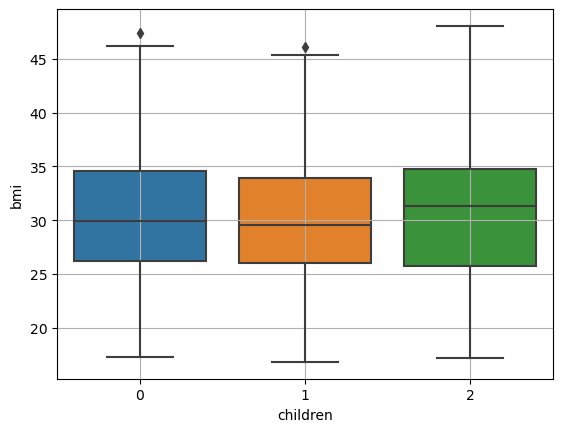

In [67]:
#  boxplots to visualize the difference in bmi values between these 3 groups
sns.boxplot(x='children',y='bmi',data=female_children)
plt.grid()
plt.show()

In [80]:
# performing the ANOVA test 
formula = 'bmi ~ C(children)'
model = ols(formula, female_children).fit()
aov_table = anova_lm(model)
p_val=aov_table['PR(>F)']['C(children)']
print("P_Value= ",p_val)

if p_val < alpha:
    print("We reject the null Hypothesis that the mean BMI of women with no children , one child, and two children are the same")
else:
    print("We fail to reject the null Hypothesis that the mean BMI of women with no children , one child, and two children are the same")

P_Value=  0.7158579926754841
We fail to reject the null Hypothesis that the mean BMI of women with no children , one child, and two children are the same


Hypothesis testing Objective:To determine if the proportion of smokers is significantly different across the different regions.

Defining
Null Hypothesis:  Smokers proportions are not significantly different across the different regions.
Alternative Hypothesis: Smokers proportions are different across the different regions.

In [81]:
# we will be using the chi-square test for this
# to calculate the contingency table we will use the crosstable() from pandas
contingency= pd.crosstab(data.region, data.smoker)
contingency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<Axes: xlabel='region'>

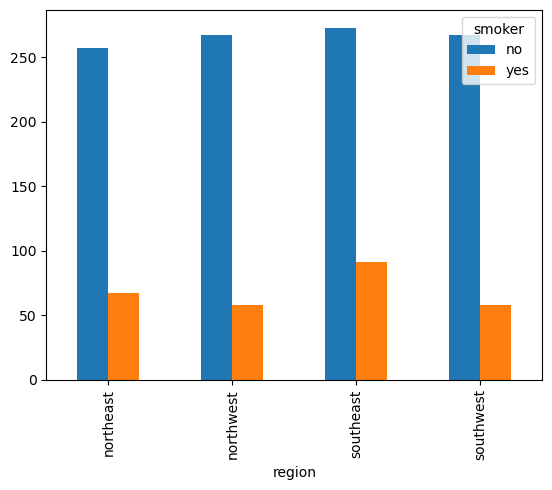

In [86]:
 contingency.plot(kind='bar')

In [92]:
chi2, p_valu, dof, exp_freq =stats.chi2_contingency(contingency, correction = False)
print('chi-square statistic: {} \np_value: {}\ndegree of freedom: {}\nexpected frequencies:\n{} '.format(chi2, p_valu, dof, exp_freq))

chi-square statistic: 7.343477761407071 
p_value: 0.06171954839170541
degree of freedom: 3
expected frequencies:
[[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [93]:
if p_valu < alpha:
    print("We reject the null Hypothesis that the Smokers proportions are not significantly different across the different regions")
else:
    print("We fail to reject the null Hypothesis that the Smokers proportions are not significantly different across the different regions")

We fail to reject the null Hypothesis that the Smokers proportions are not significantly different across the different regions


Hypothesis testing Objective:To determine if there is a difference in proportion of male and female

Defining
Null Hypothesis: No difference in proportion of males and females
Alternative Hypothesis: Difference in proportion of males and females

In [98]:
# finding the male_count and female_count from the data set
male_count=data['sex'].value_counts()['male']
female_count=data['sex'].value_counts()['female']
print('Male Count=',male_count)
print('Female Count=',female_count)

Male Count= 676
Female Count= 662


In [100]:
# calculating the proportion of male and female
total_count=male_count+female_count
proportion=np.array([male_count,female_count]/total_count)
proportion

array([0.50523169, 0.49476831])

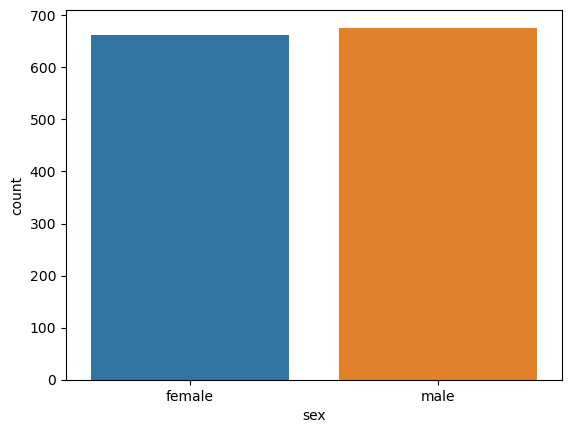

In [107]:
# representing the  male count and female count using countplot
sns.countplot(x=data['sex'],data=data)
plt.show()

In [106]:
#performing the proportions_ztest to get the p_value
alpha=0.05
z_stat, p_value2 = proportions_ztest(proportion,total_count,alpha)

print("P_value=",p_value2)


if p_value2 < alpha:
    print("We reject the null Hypothesis that there is no difference in proportion of males and females")
else:
    print("We fail to reject the null Hypothesis that  there is no difference in proportion of males and females")

P_value= 0.0
We reject the null Hypothesis that there is no difference in proportion of males and females
